In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset

In [12]:
os.getcwd()

'/content'

In [31]:
def load_labeled_spam_dataset():
    """Load labeled spam dataset."""

    # Path where csv files are located
    base_path = "./dataset/"

    # List of csv files with full path
    csv_files = [os.path.join(base_path, csv) for csv in os.listdir(base_path) if os.path.isfile(os.path.join(base_path, csv))]

    # List of dataframes for each file
    dfs = [pd.read_csv(filename) for filename in csv_files]

    # Concatenate dataframes into a single one
    df = pd.concat(dfs)

    # Rename columns
    df = df.rename(columns={"CONTENT": "text", "CLASS": "label"})

    # Set a seed for the order of rows
    df = df.sample(frac=1, random_state=824)

    return df.reset_index()


# Save the dataframe into the df_labeled variable
df_labeled = load_labeled_spam_dataset()

In [32]:
df_labeled.head()

,index,COMMENT_ID,AUTHOR,DATE,text,label
0,106,z12ecbfbewzlxxe5u04cjtmhqnzsdvyx1vs0k,leslie mendoza,2015-05-27T04:28:42.896000,best song﻿,0
1,301,_2viQ_Qnc68kPR6lRkhBHXUX2dGt04-4RgzINpv8Yhk,Ando Nesia - | MC | Music Producer,2013-08-25T04:22:28.183000,SO THEN HOW ARE YOU GOING TO CALL YOURSELF A I...,1
2,152,z13ighawfwy5y5t5a04ccnp5dozetzfpq0g,Snipe Last,2014-09-22T19:34:46,why the elephant have a broken horn﻿,0
3,157,z13guzigaxftzpnis04cjzp5itbwjvkqjk00k,Na'RUtO AnImE,2014-09-23T18:06:18,subscribe please ﻿,1
4,336,_2viQ_Qnc685qxAXpoMI-8aTnd7plcAbmTrvD_G2Czw,meg fluttershy,2013-07-25T20:47:41.071000,Love itt and ppl check out my channel!!!,1


# Further inspection and preprocessing

# Checking for data imbalance

Value counts for each class:

1    1005
0     951
Name: label, dtype: int64


<Axes: title={'center': 'proportion of each class'}, ylabel='label'>

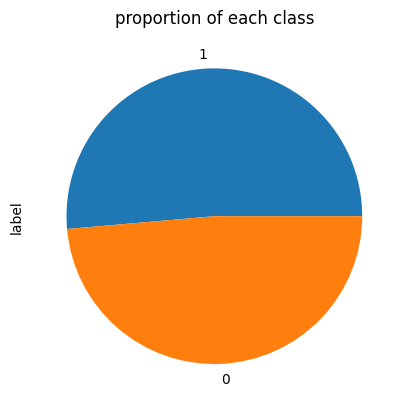

In [34]:
# Print actual value count
print(f"Value counts for each class:\n\n{df_labeled.label.value_counts()}")
df_labeled.label.value_counts().plot.pie(y='label',title="proportion of each class")

In [36]:
#drop unwanted
df_labeled = df_labeled.drop(['index','COMMENT_ID', 'AUTHOR', 'DATE'],axis=1)
df_labeled.head()

,text,label
0,best song﻿,0
1,SO THEN HOW ARE YOU GOING TO CALL YOURSELF A I...,1
2,why the elephant have a broken horn﻿,0
3,subscribe please ﻿,1
4,Love itt and ppl check out my channel!!!,1


# Cleaning the dataset

# Splitting the dataset

In [39]:
from sklearn.model_selection import train_test_split

X = df_labeled.drop(['label'],axis=1)

# Save the true labels into the y variable
y = df_labeled["label"]

# Use 1/5 of the data for testing later
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)#stratify ensures that we have the same distribution in test and train dataset

# Print number of comments for each set
print(f"There are {X_train.shape[0]} comments for training.")
print(f"There are {X_test.shape[0]} comments for testing")

There are 1564 comments for training.
There are 392 comments for testing


In [43]:
y_train.value_counts()

1    804
0    760
Name: label, dtype: int64

<Axes: title={'center': 'Proportion of each class for test set'}, ylabel='label'>

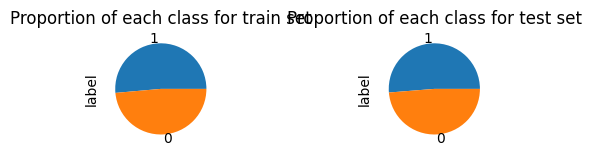

In [58]:
plt.subplot(2, 3, 4)#(num_rows, num_columns, position)
y_train.value_counts().plot.pie(y='label', title='Proportion of each class for train set', figsize=(5, 5))
plt.subplot(2, 3, 6)
y_test.value_counts().plot.pie(y='label', title='Proportion of each class for test set', figsize=(5, 5))

# **Data Labeling**
***Establishing performance lower and upper bounds for reference:***
To properly compare different labeling strategies you need to establish a baseline for model accuracy, in this case you will establish both a lower and an upper bound to compare against.

# Calculate accuracy of a labeling strategy

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,5))#considers all n_grams starting from 1->5

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

def calculate_accuracy(X_tr, y_tr, X_te=X_test, y_te=y_test,clf=MultinomialNB(), vectorizer=vectorizer):

   # Encode train text
   X_train_vect = vectorizer.fit_transform(X_tr.text.tolist())#get a list of texts
   print(X_train_vect[:5])
   # Fit model
   clf.fit(X=X_train_vect,y=y_tr)

   # Vectorize test text
   X_test_vect = vectorizer.transform(X_te.text.tolist())

   # Make predictions for the test set
   preds = clf.predict(X_test_vect)

   # Return accuracy score
   return accuracy_score(preds,y_te)

In [61]:
# Empty dictionary
accs = dict()

**Random Labeling**
Generating random labels is a natural way to establish a lower bound. You will expect that any successful alternative labeling model to outperform randomly generated labels.

Now let's calculate the accuracy for the random labeling method

In [ ]:
# Calculate random labels
rnd_labels = np.random.randint(0, 2, X_train.shape[0])

# Feed them alongside X_train to calculate_accuracy function
rnd_acc = calculate_accuracy(X_train, rnd_labels)
rnd_acc

In [75]:
# Empty list to save accuracies
rnd_accs = []
for _ in range(10):
    # Add every accuracy to the list
    rnd_accs.append(calculate_accuracy(X_train, np.random.randint(0, 2, X_train.shape[0])))
# Save result in accs dictionary
accs['random-labels'] = sum(rnd_accs)/len(rnd_accs)
# Print result
print(f"The random labelling method achieved and accuracy of {accs['random-labels']*100:.2f}%")

  (0, 30047)	1
  (1, 45858)	1
  (1, 52121)	1
  (1, 3160)	1
  (1, 33350)	1
  (1, 21361)	1
  (1, 8593)	13
  (1, 17741)	1
  (1, 38650)	1
  (1, 42521)	1
  (1, 15850)	1
  (1, 45907)	1
  (1, 52165)	1
  (1, 3232)	1
  (1, 33806)	1
  (1, 21366)	1
  (1, 8652)	12
  (1, 8844)	1
  (1, 18044)	1
  (1, 38668)	1
  (1, 42538)	1
  (1, 45908)	1
  (1, 52166)	1
  (1, 3233)	1
  (1, 33807)	1
  :	:
  (2, 11373)	1
  (2, 27291)	1
  (2, 9838)	1
  (2, 52325)	1
  (3, 33350)	1
  (3, 10965)	1
  (3, 37695)	1
  (3, 13201)	1
  (3, 39629)	1
  (3, 11084)	1
  (3, 37899)	1
  (3, 33632)	1
  (3, 13245)	1
  (3, 11142)	1
  (3, 37948)	1
  (3, 33645)	1
  (3, 11170)	1
  (3, 37953)	1
  (3, 11173)	1
  (4, 43671)	1
  (4, 6758)	1
  (4, 59254)	1
  (4, 43683)	1
  (4, 6815)	1
  (4, 43684)	1
  (0, 30047)	1
  (1, 45858)	1
  (1, 52121)	1
  (1, 3160)	1
  (1, 33350)	1
  (1, 21361)	1
  (1, 8593)	13
  (1, 17741)	1
  (1, 38650)	1
  (1, 42521)	1
  (1, 15850)	1
  (1, 45907)	1
  (1, 52165)	1
  (1, 3232)	1
  (1, 33806)	1
  (1, 21366)	1
  (1, 8652)	1

*Random labelling is completely disregarding the information from the solution space you are working on, and is just guessing the correct label. You can't probably do worse than this (or maybe you can). For this reason, this method serves as reference for comparing other labeling methods*

**Labeling with true values**

In [76]:
# Calculate accuracy when using the true labels
true_acc = calculate_accuracy(X_train, y_train)

# Save the result
accs['true-labels'] = true_acc

print(f"The true labelling method achieved and accuracy of {accs['true-labels']*100:.2f}%")

  (0, 30047)	1
  (1, 45858)	1
  (1, 52121)	1
  (1, 3160)	1
  (1, 33350)	1
  (1, 21361)	1
  (1, 8593)	13
  (1, 17741)	1
  (1, 38650)	1
  (1, 42521)	1
  (1, 15850)	1
  (1, 45907)	1
  (1, 52165)	1
  (1, 3232)	1
  (1, 33806)	1
  (1, 21366)	1
  (1, 8652)	12
  (1, 8844)	1
  (1, 18044)	1
  (1, 38668)	1
  (1, 42538)	1
  (1, 45908)	1
  (1, 52166)	1
  (1, 3233)	1
  (1, 33807)	1
  :	:
  (2, 11373)	1
  (2, 27291)	1
  (2, 9838)	1
  (2, 52325)	1
  (3, 33350)	1
  (3, 10965)	1
  (3, 37695)	1
  (3, 13201)	1
  (3, 39629)	1
  (3, 11084)	1
  (3, 37899)	1
  (3, 33632)	1
  (3, 13245)	1
  (3, 11142)	1
  (3, 37948)	1
  (3, 33645)	1
  (3, 11170)	1
  (3, 37953)	1
  (3, 11173)	1
  (4, 43671)	1
  (4, 6758)	1
  (4, 59254)	1
  (4, 43683)	1
  (4, 6815)	1
  (4, 43684)	1
The true labelling method achieved and accuracy of 90.82%


# **Automatic labeling - Trying out different labeling strategies**

***First iteration - Define some rules***

In [80]:
def labeling_rules_1(x):
  x=x.lower()
  rules=[
      "free" in x,
      "subs" in x,
      "http" in x
  ]
  if any(rules):
     return 1
  return -1

In [82]:
labels = [labeling_rules_1(label) for label in X_train.text]
# Convert to a numpy array
labels = np.asarray(labels)
labels

array([-1, -1, -1, ..., -1, -1,  1])

In [86]:
X_train.shape

(1564, 1)

In [88]:
labels

array([-1, -1, -1, ..., -1, -1,  1])

In [87]:
# Create the automatic labeled version of X_train by removing points with NO_LABEL label
X_train_al = X_train[labels != -1]
print(X_train_al.shape)
# Remove predictions with NO_LABEL label
labels_al = labels[labels != -1]

print(f"Predictions with concrete label have shape: {labels_al.shape}")
print(f"Proportion of data points kept: {labels_al.shape[0]/labels.shape[0]*100:.2f}%")

(381, 1)
Predictions with concrete label have shape: (381,)
Proportion of data points kept: 24.36%


In [89]:
# Compute accuracy when using these labels
iter_1_acc = calculate_accuracy(X_train_al, labels_al)

# Display accuracy
print(f"First iteration of automatic labeling has an accuracy of {iter_1_acc*100:.2f}%")

# Save the result
accs['first-iteration'] = iter_1_acc

  (0, 21272)	1
  (0, 15356)	1
  (0, 5229)	1
  (0, 21395)	1
  (0, 15400)	1
  (0, 21397)	1
  (1, 21272)	1
  (1, 15356)	1
  (1, 5442)	1
  (1, 17310)	2
  (1, 6525)	1
  (1, 10249)	1
  (1, 24766)	1
  (1, 6192)	1
  (1, 18063)	1
  (1, 5476)	1
  (1, 17371)	1
  (1, 15531)	1
  (1, 6549)	1
  (1, 10356)	1
  (1, 24782)	1
  (1, 6193)	1
  (1, 17445)	1
  (1, 18261)	1
  (1, 5480)	1
  :	:
  (4, 21272)	1
  (4, 2270)	1
  (4, 3152)	1
  (4, 9654)	1
  (4, 10402)	1
  (4, 14375)	1
  (4, 19535)	1
  (4, 21288)	1
  (4, 2300)	1
  (4, 3171)	1
  (4, 9655)	1
  (4, 10407)	1
  (4, 14617)	1
  (4, 21289)	1
  (4, 2301)	1
  (4, 3172)	1
  (4, 9656)	1
  (4, 10408)	1
  (4, 21290)	1
  (4, 2302)	1
  (4, 3173)	1
  (4, 9657)	1
  (4, 21291)	1
  (4, 2303)	1
  (4, 3174)	1
First iteration of automatic labeling has an accuracy of 51.28%


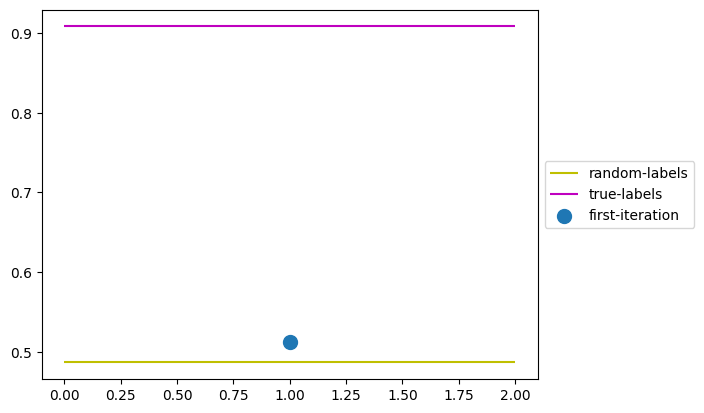

In [93]:
def plot_accuracies(accs=accs):
    colors = list("rgbcmy")
    items_num = len(accs)
    cont = 1

    for x, y in accs.items():
        if x in ['true-labels', 'random-labels', 'true-labels-best-clf']:
            plt.hlines(y, 0, (items_num-2)*2, colors=colors.pop())
        else:
            plt.scatter(cont, y, s=100)
            cont+=2
    plt.legend(accs.keys(), loc="center left",bbox_to_anchor=(1, 0.5))


plot_accuracies()

In [94]:
def label_given_rules(df, rules_function, name,
                      accs_dict=accs, verbose=True):

    # Apply labeling rules to the comments
    labels = [rules_function(label) for label in df.text]

    # Convert to a numpy array
    labels = np.asarray(labels)

    # Save initial number of data points
    initial_size = labels.shape[0]

    # Trim points with NO_LABEL label
    X_train_al = df[labels != -1]
    labels = labels[labels != -1]

    # Save number of data points after trimming
    final_size = labels.shape[0]

    # Compute accuracy
    acc = calculate_accuracy(X_train_al, labels)

    # Print useful information
    if verbose:
        print(f"Proportion of data points kept: {final_size/initial_size*100:.2f}%\n")
        print(f"{name} labeling has an accuracy of {acc*100:.2f}%\n")

    # Save accuracy to accuracies dictionary
    accs_dict[name] = acc

    return X_train_al, labels, acc

***Second iteration - Coming up with better rules***

In [95]:
def labeling_rules_2(x):

    # Convert text to lowercase
    x = x.lower()

    # Define list of rules to classify as NOT_SPAM
    not_spam_rules = [
        "view" in x,
        "song" in x
    ]

    # Define list of rules to classify as SPAM
    spam_rules = [
        "free" in x,
        "subs" in x,
        "gift" in x,
        "follow" in x,
        "http" in x
    ]

    # Classify depending on the rules
    if any(not_spam_rules):
        return 0

    if any(spam_rules):
        return 1

    return -1

  (0, 18367)	1
  (0, 6823)	1
  (0, 34725)	1
  (0, 7628)	1
  (0, 32527)	1
  (0, 37088)	1
  (0, 9078)	1
  (0, 18398)	1
  (0, 6842)	1
  (0, 34836)	1
  (0, 7800)	1
  (0, 33284)	1
  (0, 37098)	1
  (0, 18402)	1
  (0, 6843)	1
  (0, 34850)	1
  (0, 7807)	1
  (0, 33285)	1
  (0, 18403)	1
  (0, 6844)	1
  (0, 34853)	1
  (0, 7808)	1
  (0, 18404)	1
  (0, 6845)	1
  (0, 34854)	1
  :	:
  (4, 33380)	1
  (4, 39157)	1
  (4, 8808)	1
  (4, 29709)	1
  (4, 13623)	1
  (4, 18263)	1
  (4, 27322)	1
  (4, 3955)	1
  (4, 40587)	1
  (4, 38256)	1
  (4, 6981)	1
  (4, 28684)	1
  (4, 34207)	1
  (4, 30212)	1
  (4, 14762)	1
  (4, 18412)	1
  (4, 7380)	1
  (4, 33381)	1
  (4, 39158)	1
  (4, 8809)	1
  (4, 29710)	1
  (4, 13624)	1
  (4, 18264)	1
  (4, 27323)	1
  (4, 3956)	1
Proportion of data points kept: 44.69%

second-iteration labeling has an accuracy of 72.70%



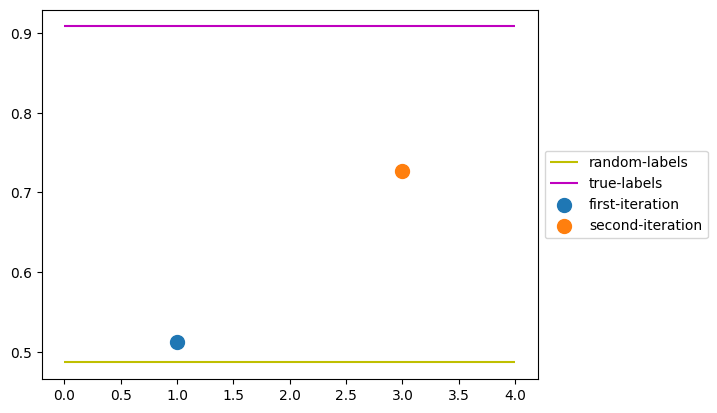

In [96]:
label_given_rules(X_train, labeling_rules_2, "second-iteration")

plot_accuracies()

In [97]:
from statistics import mean

print(f"NOT_SPAM comments have an average of {mean([len(t) for t in df_labeled[df_labeled.label==0].text]):.2f} characters.")
print(f"SPAM comments have an average of {mean([len(t) for t in df_labeled[df_labeled.label==1].text]):.2f} characters.")

NOT_SPAM comments have an average of 49.64 characters.
SPAM comments have an average of 137.34 characters.


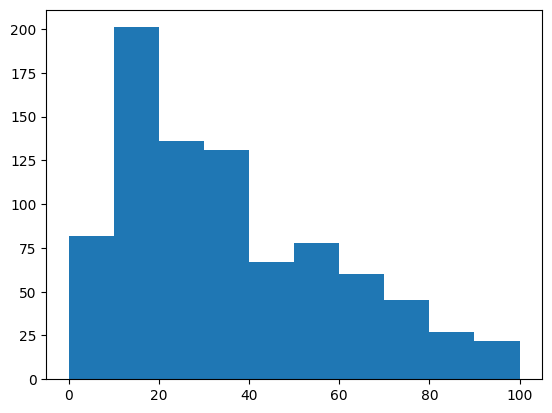

In [98]:
plt.hist([len(t) for t in df_labeled[df_labeled.label==0].text], range=(0,100))
plt.show()

***Third Iteration - Even more rules***

In [99]:
def labeling_rules_3(x):

    # Convert text to lowercase
    x = x.lower()

    # Define list of rules to classify as NOT_SPAM
    not_spam_rules = [
        "view" in x,
        "song" in x,
        len(x) < 30
    ]


    # Define list of rules to classify as SPAM
    spam_rules = [
        "free" in x,
        "subs" in x,
        "gift" in x,
        "follow" in x,
        "http" in x,
        "check out" in x
    ]

    # Classify depending on the rules
    if any(not_spam_rules):
        return 0

    if any(spam_rules):
        return 1

    return -1

  (0, 23343)	1
  (1, 21187)	1
  (1, 7656)	1
  (1, 40561)	1
  (1, 8578)	1
  (1, 37927)	1
  (1, 43296)	1
  (1, 10384)	1
  (1, 21218)	1
  (1, 7675)	1
  (1, 40677)	1
  (1, 8941)	1
  (1, 38950)	1
  (1, 43306)	1
  (1, 21222)	1
  (1, 7676)	1
  (1, 40694)	1
  (1, 8948)	1
  (1, 38951)	1
  (1, 21223)	1
  (1, 7677)	1
  (1, 40697)	1
  (1, 8949)	1
  (1, 21224)	1
  (1, 7678)	1
  :	:
  (3, 5299)	1
  (3, 46145)	1
  (3, 34207)	1
  (3, 5345)	1
  (3, 34208)	1
  (4, 8578)	1
  (4, 29425)	1
  (4, 8664)	1
  (4, 39531)	1
  (4, 42826)	1
  (4, 28391)	1
  (4, 47425)	1
  (4, 29956)	1
  (4, 40169)	1
  (4, 42988)	1
  (4, 28727)	1
  (4, 8905)	1
  (4, 29984)	1
  (4, 40218)	1
  (4, 42995)	1
  (4, 8924)	1
  (4, 29987)	1
  (4, 40219)	1
  (4, 8926)	1
  (4, 29988)	1
Proportion of data points kept: 78.20%

third-iteration labeling has an accuracy of 85.20%



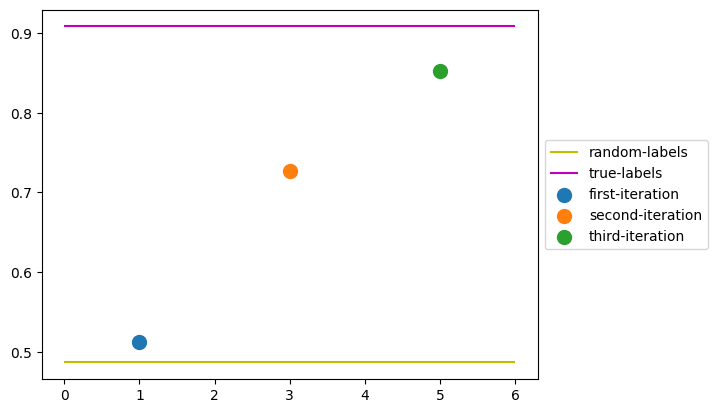

In [100]:
label_given_rules(X_train, labeling_rules_3, "third-iteration")

plot_accuracies()